In [10]:
import pandas as pd 
import numpy as np
import tweepy
import requests 
import re 
import json 
import matplotlib.pyplot as plt
import datetime
import os 
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
import csv

1.Gathering

In [11]:
df_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [12]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name=url.split('/')[-1]
xa=requests.get(url)
with open(os.path.join(file_name), 'wb') as file:
                        file.write(xa.content)

In [13]:
df2=pd.read_csv(file_name,sep='\t')

In [14]:
from zipfile import ZipFile

In [15]:
file_name = "tweet-json.zip"
with ZipFile(file_name, 'r') as zip:
    zip.extractall() 
    print('Done!') 

Done!


In [16]:
ls

image-predictions.tsv  tweet_json.txt                twitter_archive_master.csv
tweet-json copy        tweet-json.zip                wrangle_act.ipynb
tweet-json copy.txt    twitter-archive-enhanced.csv  wrangle_report.pdf


In [17]:
df3=pd.read_json('tweet-json copy.txt', lines=True, encoding='utf-8')

2.assessment

In [18]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [19]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
df_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [21]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
df3.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

3.assessment observation

A-Tidy Issue:
<br>
1.tidy issue we have three columns must be in one columns which is called type
<br>
2.merge all dataset to get maaster Data Frame to start Visualization
<br>
B-Quality Issue:
<br>
inclusion criteria only original tweets
<br>
inclusion criteria only tweets that have image
<br>
timestamp is sorted as object first dataframe 
<br>
all denominator must be reasonable 10 first dataframe
<br>
numerator has outlier first dataframe
<br>
dog type has three columns first dataframe
<br>
the name column has value of none it should be NaN first dataframe
<br>
Source should be cleaned in second dataframe
<br>
some columns are in complete like image no column in second dataframe is useless
<br>
id column should be changed to tweet_id in the third dataframe
<br>
in the third dataframe has columns that has useless data

In [25]:
df_archivec=df_archive.copy()
df2c=df2.copy()
df3c=df3.copy()

4.cleaning (define, code, test)

4.1.1inclusion criteria only original tweets

4.1.2. code

In [26]:
df_archive = df_archive[pd.isnull(df_archive['in_reply_to_status_id'])]

In [27]:
df_archive = df_archive[pd.isnull(df_archive['retweeted_status_id'])]

In [28]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [29]:
df_archive=df_archive.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'])

4.1.3. test

In [30]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


4.2.1.inclusion criteria only tweets that have image timestamp is sorted as object first dataframe

4.2.2. code

In [31]:
x=list(df2['tweet_id'])

In [32]:
len(x)

2075

In [33]:
df_archive = df_archive[df_archive['tweet_id'].isin(x)]

4.2.3. test

In [34]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dtypes: int64(3), object(9)
memory usage: 200.2+ KB


4.3.1.all denominator must be reasonable first dataframe


In [35]:
df_archive.describe()

,tweet_id,rating_numerator,rating_denominator
count,1.971000e+03,1971.000000,1971.000000
mean,7.360418e+17,12.223237,10.477423
std,6.752810e+16,41.634034,6.853275
min,6.660209e+17,0.000000,2.000000
25%,6.758656e+17,10.000000,10.000000
50%,7.088343e+17,11.000000,10.000000
75%,7.880951e+17,12.000000,10.000000
max,8.924206e+17,1776.000000,170.000000


4.3.2.code

In [36]:
df_archive['rating_denominator'].value_counts()

10     1954
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [37]:
unexpected_denominator=[50,80,11,170,150,120,110,90,70,40,20,7,2]
u_d=unexpected_denominator
len(u_d)

13

In [38]:
df_archive[df_archive['rating_denominator'].isin (u_d)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


In [39]:
df2[df2['tweet_id']==820690176645140481]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1728,820690176645140481,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.0374,True


In [40]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg")

it is for seven dog so it will be divided 
<br>
what should we do for number that less than 10

In [41]:
df_archive[df_archive['rating_denominator']==2]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [42]:
df2[df2['tweet_id']==666287406224695296	]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


In [43]:
Image(url= 'https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg	')

let see the text

In [44]:
df_archive[df_archive['rating_denominator']==2].text

2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object

so we wil drop it because it doesn't match the critria for rating

In [45]:
df_archive[df_archive['rating_denominator']==7]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [46]:
df2[df2['tweet_id']==810984652412424192]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1658,810984652412424192,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True


In [47]:
Image(url= 'https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg	')

let see the text

In [48]:
df_archive[df_archive['rating_denominator']==7].text

516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object

so we wil drop it because it doesn't match the critria for rating

In [49]:
df_archive = df_archive[df_archive['rating_denominator'].isin([2,7])==False]

let's divide the rating by count of dogs 

In [50]:
df_archive['rating_denominator']=df_archive['rating_denominator'].replace([50,80,11,170,150,120,110,90,70,40,20],10)

df_archive['rating_numerator']=df_archive['rating_numerator'].replace([84,165,204,50,99,80,45,60,44,121],[84/7,165/15,204/17,50/5,99/9,80/8,45/5,60/5,44/4,121/11])

4.3.3.test

In [51]:
df_archive[df_archive['rating_denominator'].isin (u_d)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


4.4.1.numerator has outlier first dataframe

In [52]:
df_archive['rating_numerator'].value_counts()

12.0      449
10.0      419
11.0      396
13.0      253
9.0       151
8.0        95
7.0        52
5.0        33
14.0       33
6.0        32
3.0        19
4.0        16
2.0         9
1.0         4
26.0        1
144.0       1
1776.0      1
27.0        1
0.0         1
88.0        1
75.0        1
420.0       1
Name: rating_numerator, dtype: int64

In [53]:
df_archive['rating_numerator'].describe()

count    1969.000000
mean       11.794820
std        41.067829
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

4.4.2.code

In [54]:
df_archive[df_archive['rating_numerator']==420]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2074,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,None,None,None,None,None


In [55]:
df2[df2['tweet_id']==670842764863651840]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
277,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False


In [56]:
Image(url= 'https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg	')

it is for snoop dog we will drop it 

In [57]:
df_archive[df_archive['rating_numerator']==1776]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,None,None,None,None


In [58]:
df2[df2['tweet_id']==749981277374128128]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1270,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


In [59]:
Image(url= 'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg	')

it is for dog let's check the text

In [60]:
df_archive[df_archive['rating_numerator']==1776].text

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object

In [61]:
e=[420]
df_archive = df_archive[df_archive['rating_numerator'].isin(e)==False]

In [62]:
df_archive[df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text','rating_numerator']]

,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [63]:
t=df_archive[df_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract((r"(\d+\.\d*\/\d+)"))

In [64]:
t

,0
45,13.5/10
695,9.75/10
763,11.27/10
1712,11.26/10


In [65]:
df_archive['rating_numerator']=df_archive['rating_numerator'].replace(45,13.5)
df_archive['rating_numerator']=df_archive['rating_numerator'].replace(695,9.75)
df_archive['rating_numerator']=df_archive['rating_numerator'].replace(763,11.27)
df_archive['rating_numerator']=df_archive['rating_numerator'].replace(1712,11.26)

4.4.3.test

In [66]:
df_archive['rating_numerator'].value_counts()

12.0      449
10.0      419
11.0      396
13.0      253
9.0       151
8.0        95
7.0        52
5.0        33
14.0       33
6.0        32
3.0        19
4.0        16
2.0         9
1.0         4
26.0        1
75.0        1
27.0        1
0.0         1
144.0       1
88.0        1
1776.0      1
Name: rating_numerator, dtype: int64

4.5.1.dog type has three columns first dataframe


In [67]:
df_archive['doggo'].value_counts()

None     1895
doggo      73
Name: doggo, dtype: int64

In [68]:
df_archive['floofer'].value_counts()

None       1960
floofer       8
Name: floofer, dtype: int64

In [69]:
df_archive['pupper'].value_counts()

None      1759
pupper     209
Name: pupper, dtype: int64

In [70]:
df_archive['puppo'].value_counts()

None     1945
puppo      23
Name: puppo, dtype: int64

4.5.2.code

In [71]:
df_archive['doggo']=df_archive['doggo'].replace('None','')

In [72]:
df_archive['floofer']=df_archive['floofer'].replace('None','')

In [73]:
df_archive['pupper']=df_archive['pupper'].replace('None','')

In [74]:
df_archive['puppo']=df_archive['puppo'].replace('None','')

In [75]:
df_archive['doggo'].value_counts()

         1895
doggo      73
Name: doggo, dtype: int64

In [76]:
df_archive['type']=df_archive['doggo']+df_archive['floofer']+df_archive['pupper']+df_archive['puppo']

In [77]:
df_archive['type'].value_counts()

                1665
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggofloofer       1
doggopuppo         1
Name: type, dtype: int64

we have 12 value of doggopupper let see

In [78]:
df_archive['type']=df_archive['type'].replace('doggopupper','doggo/pupper')

In [79]:
df_archive[df_archive['type']=='doggopuppo']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,type
191,855851453814013952,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10,None,doggo,,,puppo,doggopuppo


In [80]:
df_archive['type']=df_archive['type'].replace('doggopuppo','puppo')

In [81]:
df_archive[df_archive['type']=='doggofloofer']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,type
200,854010172552949760,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11.0,10,None,doggo,floofer,,,doggofloofer


In [82]:
df_archive['type']=df_archive['type'].replace('doggofloofer','floofer')

In [83]:
df_archive['type'].value_counts()

                1665
pupper           201
doggo             63
puppo             23
doggo/pupper       8
floofer            8
Name: type, dtype: int64

In [84]:
df_archive=df_archive.drop(columns=['doggo','floofer','pupper','puppo'])

4.5.3.test

In [85]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1968 non-null int64
timestamp             1968 non-null object
source                1968 non-null object
text                  1968 non-null object
expanded_urls         1968 non-null object
rating_numerator      1968 non-null float64
rating_denominator    1968 non-null int64
name                  1968 non-null object
type                  1968 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 153.8+ KB


4.6.1.the name column has value of none it should be NaN first dataframe

In [86]:
df_archive['name'].value_counts()

None          523
a              55
Charlie        11
Oliver         10
Lucy           10
Cooper         10
Penny           9
Tucker          9
Sadie           8
Winston         8
Daisy           7
the             7
Lola            7
Toby            7
Jax             6
Koda            6
Bella           6
Stanley         6
Bo              6
Chester         5
Oscar           5
an              5
Leo             5
Scout           5
Buddy           5
Bailey          5
Dave            5
Louis           5
Rusty           5
Milo            5
             ... 
Rover           1
Jamesy          1
Andru           1
Chelsea         1
Maude           1
Eriq            1
Kevon           1
Carbon          1
Trevith         1
Lipton          1
Mark            1
Fwed            1
Dallas          1
Mason           1
Brandonald      1
Rooney          1
Sailer          1
Baron           1
Tilly           1
Ralph           1
Jangle          1
Cilantro        1
Grady           1
Blue            1
Moofasa   

4.6.2.code

In [87]:
df_archive['name']=df_archive['name'].replace('None','NaN')

4.6.3.test

In [88]:
df_archive['name'].value_counts()

NaN           523
a              55
Charlie        11
Oliver         10
Cooper         10
Lucy           10
Penny           9
Tucker          9
Sadie           8
Winston         8
Toby            7
Daisy           7
Lola            7
the             7
Bo              6
Stanley         6
Bella           6
Jax             6
Koda            6
Louis           5
Oscar           5
an              5
Leo             5
Bailey          5
Chester         5
Scout           5
Rusty           5
Milo            5
Dave            5
Buddy           5
             ... 
Jamesy          1
Andru           1
Chelsea         1
Pippin          1
Sandra          1
Tonks           1
Trevith         1
Eriq            1
Lipton          1
Mark            1
Fwed            1
Dallas          1
Mason           1
Brandonald      1
Rooney          1
Sailer          1
Baron           1
Tilly           1
Ralph           1
Jangle          1
Cilantro        1
Grady           1
Blue            1
Moofasa         1
Monkey    

4.7.1.Source should be cleaned in second dataframe

In [89]:
df_archive['source'].nunique()

3

In [90]:
df_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1929
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

4.7.2.code

In [91]:
df_archive['source']=df_archive['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone')

In [92]:
df_archive['source']=df_archive['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')

In [93]:
df_archive['source']=df_archive['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','Tweet Deck')

In [94]:
df_archive['source'].value_counts()

Twitter for iPhone    1929
Twitter Web Client      28
Tweet Deck              11
Name: source, dtype: int64

In [95]:
df_archive['source']=df_archive['source'].astype('category')

4.7.3.test

In [96]:
df_archive['source'].unique()

[Twitter for iPhone, Twitter Web Client, Tweet Deck]
Categories (3, object): [Twitter for iPhone, Twitter Web Client, Tweet Deck]

4.8.1.some columns are in complete like image no column in second dataframe is useless

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


4.8.2.code

In [98]:
df2=df2.drop(columns=['img_num'])

4.8.3.test

In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


4.9.1.id column should be changed to tweet_id in the third dataframe

In [100]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [101]:
col3=df3.columns
col3

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

4.9.2.code

In [102]:
col3=['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'tweet_id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user']
df3.columns=col3

4.9.3.test

In [103]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
tweet_id                         2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

4.10.1.in the third dataframe has columns that has useless data


In [104]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
tweet_id                         2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

4.10.2.code

In [105]:
df3=df3.drop(columns=['contributors', 'coordinates', 'geo', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'place',
       'retweet_count', 'retweeted', 'retweeted_status'])

4.10.3.test

In [106]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 19 columns):
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
tweet_id                         2354 non-null int64
id_str                           2354 non-null int64
is_quote_status                  2354 non-null bool
lang                             2354 non-null object
possibly_sensitive               2211 non-null float64
possibly_sensitive_appealable    2211 non-null float64
quoted_status                    28 non-null object
quoted_status_id                 29 non-null float64
quoted_status_id_str             29 non-null float64
source                        

4.11.1.timestamp is sorted as object

In [107]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1968 non-null int64
timestamp             1968 non-null object
source                1968 non-null category
text                  1968 non-null object
expanded_urls         1968 non-null object
rating_numerator      1968 non-null float64
rating_denominator    1968 non-null int64
name                  1968 non-null object
type                  1968 non-null object
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 140.4+ KB


4.11.2.code

In [108]:
df_archive['timestamp']=df_archive['timestamp'].str[:-7]

In [109]:
df_archive['timestamp']=pd.to_datetime(df_archive['timestamp'])

4.11.3.test

In [110]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1968 non-null int64
timestamp             1968 non-null datetime64[ns]
source                1968 non-null category
text                  1968 non-null object
expanded_urls         1968 non-null object
rating_numerator      1968 non-null float64
rating_denominator    1968 non-null int64
name                  1968 non-null object
type                  1968 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 140.4+ KB


4.12.1.merging for tidness and visualisation

4.12.2.code

In [111]:
df4=pd.merge(df_archive, df2, on="tweet_id")


In [112]:
dfm=pd.merge(df4, df3, on="tweet_id")


4.12.3.test

In [113]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1967
Data columns (total 37 columns):
tweet_id                         1968 non-null int64
timestamp                        1968 non-null datetime64[ns]
source_x                         1968 non-null category
text                             1968 non-null object
expanded_urls                    1968 non-null object
rating_numerator                 1968 non-null float64
rating_denominator               1968 non-null int64
name                             1968 non-null object
type                             1968 non-null object
jpg_url                          1968 non-null object
p1                               1968 non-null object
p1_conf                          1968 non-null float64
p1_dog                           1968 non-null bool
p2                               1968 non-null object
p2_conf                          1968 non-null float64
p2_dog                           1968 non-null bool
p3                    

In [114]:
dfm.to_csv('twitter_archive_master.csv')

5.Visualizations

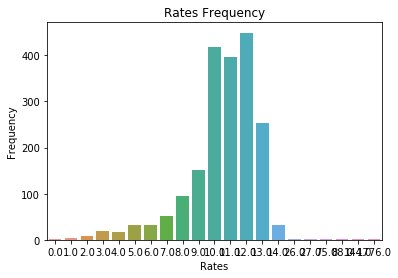

In [115]:
from pylab import *
data=dfm.rating_numerator.value_counts()
x=data.index
y=data.values
sns.barplot(x,y,)
rcParams['figure.figsize'] = 20,5
plt.title('Rates Frequency')
plt.xlabel('Rates')
plt.ylabel('Frequency');

let's see if there is a correlation between raing and retweet count

In [116]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1967
Data columns (total 37 columns):
tweet_id                         1968 non-null int64
timestamp                        1968 non-null datetime64[ns]
source_x                         1968 non-null category
text                             1968 non-null object
expanded_urls                    1968 non-null object
rating_numerator                 1968 non-null float64
rating_denominator               1968 non-null int64
name                             1968 non-null object
type                             1968 non-null object
jpg_url                          1968 non-null object
p1                               1968 non-null object
p1_conf                          1968 non-null float64
p1_dog                           1968 non-null bool
p2                               1968 non-null object
p2_conf                          1968 non-null float64
p2_dog                           1968 non-null bool
p3                    

In [158]:
dfm.groupby(['source_x'])['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
source_x,,,,,,,,
Tweet Deck,11.0,5793.545455,5257.024660,2383.0,3158.50,3502.0,4730.00,18278.0
Twitter Web Client,28.0,6083.642857,9455.384675,203.0,395.75,715.5,7528.75,35178.0
Twitter for iPhone,1929.0,9015.318818,12335.162901,81.0,2040.00,4181.0,11467.00,132810.0


In [167]:
dfm['name'].value_counts()

NaN           523
a              55
Charlie        11
Oliver         10
Cooper         10
Lucy           10
Penny           9
Tucker          9
Sadie           8
Winston         8
Toby            7
Daisy           7
Lola            7
the             7
Bo              6
Stanley         6
Bella           6
Jax             6
Koda            6
Louis           5
Oscar           5
an              5
Leo             5
Bailey          5
Chester         5
Scout           5
Rusty           5
Milo            5
Dave            5
Buddy           5
             ... 
Jamesy          1
Andru           1
Chelsea         1
Pippin          1
Sandra          1
Tonks           1
Trevith         1
Eriq            1
Lipton          1
Mark            1
Fwed            1
Dallas          1
Mason           1
Brandonald      1
Rooney          1
Sailer          1
Baron           1
Tilly           1
Ralph           1
Jangle          1
Cilantro        1
Grady           1
Blue            1
Moofasa         1
Monkey    

In [162]:
dfm.groupby(['type'])['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
,1665.0,8534.410210,11267.365920,81.0,1691.00,3926.0,11101.00,107956.0
doggo,63.0,19356.380952,22208.483825,2593.0,8268.00,12376.0,20502.50,131075.0
doggo/pupper,8.0,13219.875000,12872.606889,4849.0,8206.25,9346.5,10731.75,44619.0
floofer,8.0,13701.375000,10516.926166,2262.0,5560.75,11879.0,18623.25,33345.0
pupper,201.0,7250.527363,10743.931650,693.0,2449.00,3275.0,7842.00,106827.0
puppo,23.0,22723.913043,27931.824108,3277.0,7067.00,15359.0,21977.50,132810.0


In [163]:
dfm.groupby(['type'])['rating_numerator'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
,1665.0,11.676276,43.517048,0.0,10.0,11.0,12.0,1776.0
doggo,63.0,11.888889,1.471351,8.0,11.0,12.0,13.0,14.0
doggo/pupper,8.0,11.000000,2.563480,5.0,11.5,12.0,12.0,13.0
floofer,8.0,11.875000,1.125992,10.0,11.0,12.0,13.0,13.0
pupper,201.0,10.716418,2.084269,3.0,10.0,11.0,12.0,27.0
puppo,23.0,12.043478,1.296087,9.0,11.5,12.0,13.0,14.0


In [174]:
dfm['favorite_count'].max()

132810

In [175]:
dfm[dfm['favorite_count']==132810]

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,type,jpg_url,...,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,source_y,truncated,user
306,822872901745569793,2017-01-21 18:26:00,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10,NaN,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,...,False,en,0.0,0.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [176]:
Image(url= 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg	')